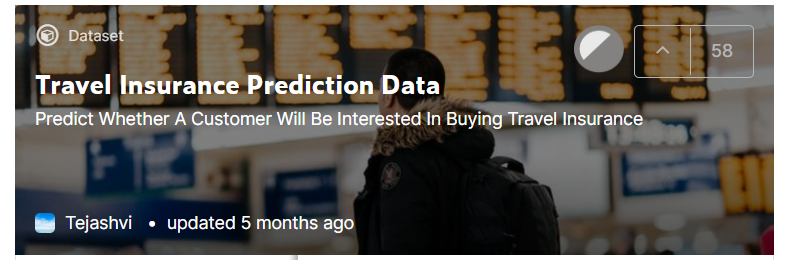
ref) https://www.kaggle.com/tejashvi14/travel-insurance-prediction-data

### 1. Data Load

In [177]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [178]:
os.getcwd()

'C:\\AI\\Python 3.8\\venv\\comp\\credit_k'

In [179]:
df=pd.read_csv('./quiz00.csv')
df.head()

,Unnamed: 0,나이,고용타입,대졸여부,연소득,가족수,만성질환여부,유료회원여부,여행경험여부,여행관련보험상품가입여부예측
0,0,31.0,정부,Yes,400000,6,1,No,No,0
1,1,31.0,민.간,Yes,1250000,7,0,No,No,0
2,2,34.0,민.간,Yes,500000,4,1,No,No,1
3,3,28.0,민.간,Yes,700000,3,1,No,No,0
4,4,28.0,민.간,Yes,700000,8,1,Yes,No,0


In [180]:
df.shape

(1987, 10)

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      1987 non-null   int64  
 1   나이              1975 non-null   float64
 2   고용타입            1987 non-null   object 
 3   대졸여부            1987 non-null   object 
 4   연소득             1987 non-null   int64  
 5   가족수             1987 non-null   object 
 6   만성질환여부          1987 non-null   int64  
 7   유료회원여부          1987 non-null   object 
 8   여행경험여부          1957 non-null   object 
 9   여행관련보험상품가입여부예측  1987 non-null   int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 155.4+ KB


결측치 확인

In [182]:
df.isnull().sum()

Unnamed: 0         0
나이                12
고용타입               0
대졸여부               0
연소득                0
가족수                0
만성질환여부             0
유료회원여부             0
여행경험여부            30
여행관련보험상품가입여부예측     0
dtype: int64

### 2. EDA

#### 1) Target (보험가입여부)

<AxesSubplot:>

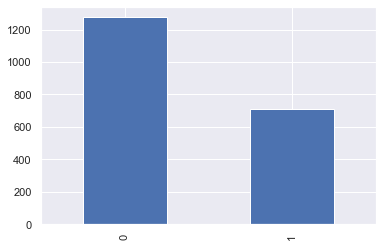

In [183]:
df['여행관련보험상품가입여부예측'].value_counts().plot(kind='bar')

#### 2) 필요없는 컬럼 제거

In [184]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [185]:
df.describe()

,나이,연소득,만성질환여부,여행관련보험상품가입여부예측
count,1975.000000,1.987000e+03,1987.000000,1987.000000
mean,29.668354,9.327630e+05,0.277806,0.357323
std,2.898290,3.768557e+05,0.448030,0.479332
min,25.000000,3.000000e+05,0.000000,0.000000
25%,28.000000,6.000000e+05,0.000000,0.000000
50%,29.000000,9.000000e+05,0.000000,0.000000
75%,32.000000,1.250000e+06,1.000000,1.000000
max,35.000000,1.800000e+06,1.000000,1.000000


#### 3) 타입 변환

In [186]:
df.select_dtypes(include='object')

,고용타입,대졸여부,가족수,유료회원여부,여행경험여부
0,정부,Yes,6,No,No
1,민.간,Yes,7,No,No
2,민.간,Yes,4,No,No
3,민.간,Yes,3,No,No
4,민.간,Yes,8,Yes,No
...,...,...,...,...,...
1982,민간,Yes,4,Yes,Yes
1983,민간,Yes,5,No,Yes
1984,민간,Yes,6,No,No
1985,민간,Yes,6,Yes,Yes


- 고용타입

In [187]:
df['고용타입'].unique()

array(['정부', '민.간', '민간', '민 간'], dtype=object)

In [188]:
df['고용타입']=df['고용타입'].replace(['민.간','민 간'],['민간','민간'])

In [189]:
df['고용타입'].unique() ## 확인용

array(['정부', '민간'], dtype=object)

In [190]:
df= pd.get_dummies(df,columns=['고용타입'])
df.rename(columns={'고용타입_민간':'고용타입'},inplace=True)

In [191]:
df.drop(['고용타입_정부'],axis=1,inplace=True)

- 대졸여부

In [192]:
df['대졸여부'].unique()

array(['Yes', 'No'], dtype=object)

In [193]:
df = pd.get_dummies(df,columns=['대졸여부'])
df.rename(columns={'대졸여부_No':'대졸여부'},inplace=True)

In [194]:
df.drop(['대졸여부_Yes'],axis=1,inplace=True)

- 가족수

In [195]:
df['가족수'][df['가족수']=='NAN']
df['가족수'].describe()

count     1987
unique       9
top          4
freq       504
Name: 가족수, dtype: object

In [196]:
df['가족수']=df['가족수'].replace(['NAN'],[4]) #최빈도 넣기

In [197]:
df['가족수']=df['가족수'].astype('int')

In [198]:
df['가족수'].value_counts()

4    505
5    426
3    377
6    294
7    178
2     93
8     59
9     55
Name: 가족수, dtype: int64

In [ ]:
pd.cut(df['가족수']

- 유료회원여부

In [199]:
df['유료회원여부'].unique()
df = pd.get_dummies(df,columns=['유료회원여부'])
df.rename(columns={'유료회원여부_No':'유료회원여부'},inplace=True)
df.drop(['유료회원여부_Yes'],axis=1,inplace=True)

- 여행경험여부

In [200]:
df['여행경험여부'].unique()

array(['No', 'Yes', nan], dtype=object)

In [201]:
#결측치 처리
df['여행경험여부']=df['여행경험여부'].fillna('No')

In [202]:
df = pd.get_dummies(df,columns=['여행경험여부'])
df.rename(columns={'여행경험여부_No':'여행경험여부'},inplace=True)
df.drop(['여행경험여부_Yes'],axis=1,inplace=True)

#### 결측치 

In [203]:
df.isnull().sum()

나이                12
연소득                0
가족수                0
만성질환여부             0
여행관련보험상품가입여부예측     0
고용타입               0
대졸여부               0
유료회원여부             0
여행경험여부             0
dtype: int64

In [204]:
df['나이']= df['나이'].fillna(df['나이'].mean())

In [205]:
df = df.astype('int')

#### 연소득

In [206]:
df['연소득'].describe()

count    1.987000e+03
mean     9.327630e+05
std      3.768557e+05
min      3.000000e+05
25%      6.000000e+05
50%      9.000000e+05
75%      1.250000e+06
max      1.800000e+06
Name: 연소득, dtype: float64

<AxesSubplot:xlabel='연소득', ylabel='Density'>

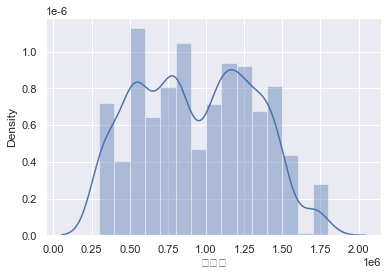

In [207]:
sns.distplot(df['연소득'])

### 모델 생성 및 평가

In [208]:
from sklearn.model_selection import train_test_split

X = df[df.columns.difference(['여행관련보험상품가입여부예측'])]
y = df['여행관련보험상품가입여부예측']

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1490, 8) (497, 8) (1490,) (497,)


- 로지스틱 회귀분석

In [209]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
lr = LogisticRegression(penalty='l2')
lr.fit(X_train,y_train)
y_vld= lr.predict(X_test)
f1 = f1_score(y_test,y_vld,average='macro')
print(f'{f1:.4f}') 

0.3924


* 랜덤 포레스트

In [210]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(n_estimators=100) 
rf.fit(X_train,y_train) 
y_vld =rf.predict(X_test)
f1_score = f1_score(y_test,y_vld,average='macro')
print(f"{f1_score:.4f}") 

0.7715


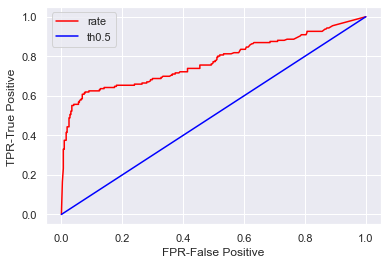

auc:0.7741


In [211]:
from sklearn.metrics import roc_auc_score,roc_curve 

rf= RandomForestClassifier() 
rf.fit(X_train,y_train) 
pred = rf.predict(X_test)
proba= rf.predict_proba(X_test)

fpr,tpr,th = roc_curve(y_test,proba[:,1])

plt.xlabel('FPR-False Positive') 
plt.ylabel('TPR-True Positive ')
plt.plot(fpr,tpr,'red',label = 'rate')
plt.plot([0,1],[0,1],'blue',label = 'th0.5')
plt.legend()
plt.show()

auc=roc_auc_score(y_test,proba[:,1])
print(f'auc:{auc:.4f}')

### 모델 검증 및 튜닝

In [212]:
from sklearn.model_selection import GridSearchCV

rf =  RandomForestClassifier(n_estimators=100)

myparam = {'n_estimators':[100,200,300], 'min_samples_split':[1,2,3,4]}

gcv_model = GridSearchCV(rf, param_grid=myparam, scoring="f1_macro", refit=True, cv=5)

gcv_model.fit(X_train,y_train)
print(gcv_model.best_score_) #학습된 데이터들 중 best score
print(gcv_model.best_params_) #학습된 데이터들 중 best_params

0.7718247812755188
{'min_samples_split': 4, 'n_estimators': 100}
